In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
covid = pd.read_csv("data/covid_us_impact_by_state.csv", index_col=0)
covid.head()

,Confirmed_cases,Deaths
State,,
Alabama,42862,1007
Alaska,1107,16
American Samoa,0,0
Arizona,94567,1817
Arkansas,23209,286


In [3]:
party_data = pd.read_csv("data/party_data_by_state.csv", index_col=0)
party_data.head()

,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update])
State,,,,,,,,
Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican
Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican
Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican
Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican
California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic


In [4]:
pop_data = pd.read_csv("raw_data/pop_density_by_state.csv")
pop_data.head()

# Density is calculated as population/landArea (in people per square mile)

,State,Density,Pop,LandArea
0,Washington DC,11814.5410,720687,61
1,New Jersey,1215.1985,8936570,7354
2,Rhode Island,1021.4313,1056160,1034
3,Massachusetts,894.4359,6976600,7800
4,Connecticut,735.8695,3563080,4842


In [5]:
df = party_data.merge(covid, on = "State")
df

,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,Deaths
State,,,,,,,,,,
Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,42862,1007
Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican,1107,16
Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican,94567,1817
Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,23209,286
California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,252895,6334
Colorado,Democratic,Democratic,Democratic,Democratic,Democratic,Republican,Democratic,Democratic,33849,1701
Connecticut,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,46717,4335
Delaware,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,11996,512
Florida,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Democratic,190052,3702


In [ ]:
df = df.merge(pop_data, on = "State")
df.head()

In [9]:
df = df.assign(confirmed_cases_per_1000_inhabitants = df["Confirmed_cases"] / df["Pop"] * 1000)
df = df.assign(deaths_per_1000_inhabitants = df["Deaths"] / df["Pop"] * 1000)
df

,State,2016 presidentialelection,Governor,State Senate,State House,SeniorU.S. Senator,JuniorU.S. Senator,U.S. House of Representatives,Partisan split (as of 2018[update]),Confirmed_cases,Deaths,Density,Pop,LandArea,confirmed_cases_per_1000_inhabitants,deaths_per_1000_inhabitants
0,Alabama,Republican,Republican,Republican,Republican,Republican,Democratic,Republican,Republican,42862,1007,96.9221,4908620,50645,8.731986,0.205149
1,Alaska,Republican,Republican,Republican,Coalition,Republican,Republican,Republican,Republican,1107,16,1.2863,734002,570641,1.508170,0.021798
2,Arizona,Republican,Republican,Republican,Republican,Democratic,Republican,Democratic,Republican,94567,1817,64.9549,7378490,113594,12.816579,0.246256
3,Arkansas,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Republican,23209,286,58.4030,3039000,52035,7.637052,0.094110
4,California,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,252895,6334,256.3728,39937500,155779,6.332269,0.158598
5,Colorado,Democratic,Democratic,Democratic,Democratic,Democratic,Republican,Democratic,Democratic,33849,1701,56.4012,5845530,103642,5.790578,0.290992
6,Connecticut,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,46717,4335,735.8695,3563080,4842,13.111409,1.216644
7,Delaware,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,Democratic,11996,512,504.3073,982895,1949,12.204762,0.520910
8,Florida,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Democratic,190052,3702,410.1259,21993000,53625,8.641477,0.168326
9,Georgia,Republican,Republican,Republican,Republican,Republican,Republican,Republican,Democratic,93319,2857,186.6726,10736100,57513,8.692076,0.266112


In [10]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "Confirmed_cases"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "Confirmed_cases"])

Ttest_indResult(statistic=-1.2585342634117844, pvalue=0.2142857052525108)

In [11]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "Deaths"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "Deaths"])

Ttest_indResult(statistic=-2.010594529225126, pvalue=0.050004403845536415)

In [12]:
df.loc[df["2016 presidentialelection"] == "Republican", "Deaths"].mean()

1427.1666666666667

In [13]:
df.loc[df["2016 presidentialelection"] == "Democratic", "Deaths"].mean()

4306.65

In [14]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "confirmed_cases_per_1000_inhabitants"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "confirmed_cases_per_1000_inhabitants"])

Ttest_indResult(statistic=-1.678914079355577, pvalue=0.09966814276702893)

In [15]:
scipy.stats.ttest_ind(df.loc[df["2016 presidentialelection"] == "Republican", "deaths_per_1000_inhabitants"], 
                      df.loc[df["2016 presidentialelection"] == "Democratic", "deaths_per_1000_inhabitants"])

Ttest_indResult(statistic=-3.104210458450826, pvalue=0.0031962233121866747)

In [16]:
df.loc[df["2016 presidentialelection"] == "Republican", "deaths_per_1000_inhabitants"].mean()

0.19246483742187975

In [17]:
df.loc[df["2016 presidentialelection"] == "Democratic", "deaths_per_1000_inhabitants"].mean()

0.5140193995861481

In [18]:
scipy.stats.ttest_ind(df.loc[df["Governor"] == "Republican", "deaths_per_1000_inhabitants"], 
                      df.loc[df["Governor"] == "Democratic", "deaths_per_1000_inhabitants"])

Ttest_indResult(statistic=-2.168732746535719, pvalue=0.03508852719221658)

In [19]:
df = df.sort_values("deaths_per_1000_inhabitants", ascending=False)

cmap = list(np.where(df["2016 presidentialelection"] == "Democratic", "blue", "red"))

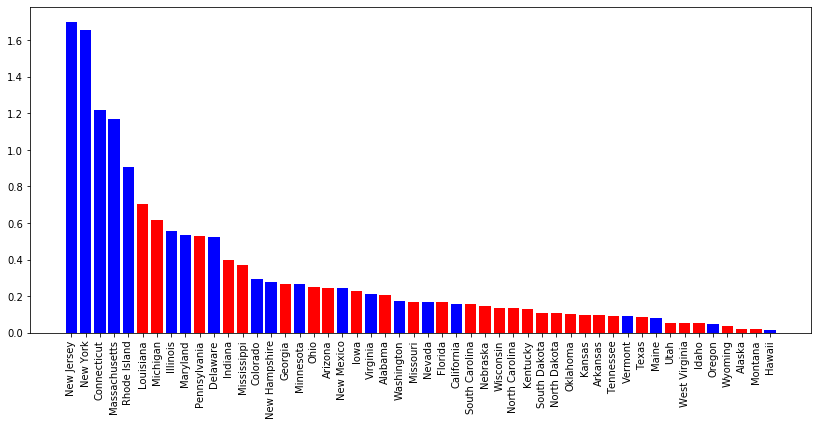

In [20]:
fig, ax = plt.subplots(figsize = (14, 6))

ax.bar(df["State"],
       df["deaths_per_1000_inhabitants"], 
       color = cmap)

plt.xticks(rotation=90);

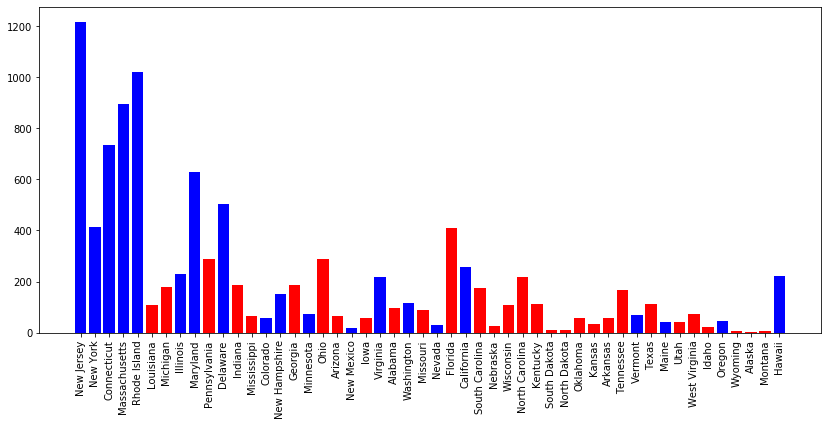

In [21]:
fig, ax = plt.subplots(figsize = (14, 6))

ax.bar(df["State"],
       df["Density"], 
       color = cmap)

plt.xticks(rotation=90);

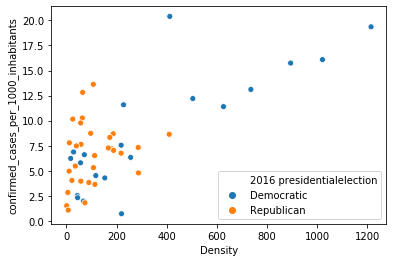

In [22]:
sns.scatterplot(data = df, x = "Density", y = "confirmed_cases_per_1000_inhabitants", hue = "2016 presidentialelection");

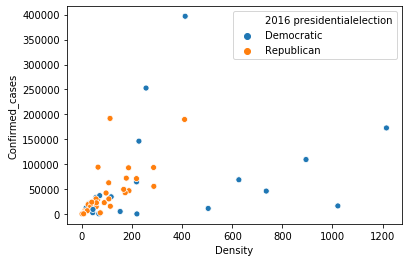

In [23]:
sns.scatterplot(data = df, x = "Density", y = "Confirmed_cases", hue = "2016 presidentialelection");

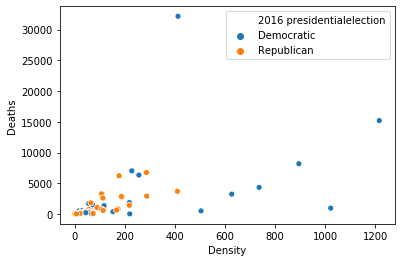

In [24]:
sns.scatterplot(data = df, x = "Density", y = "Deaths", hue = "2016 presidentialelection");

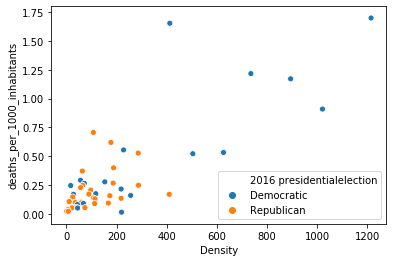

In [25]:
sns.scatterplot(data = df, x = "Density", y = "deaths_per_1000_inhabitants", hue = "2016 presidentialelection");

In [26]:
df["Density"].corr(df["Deaths"])

0.47132524832124534

In [27]:
df["Density"].corr(df["deaths_per_1000_inhabitants"])

0.805247986436947

In [28]:
df["Density"].corr(df["Confirmed_cases"])

0.37665687491527106

In [29]:
df["Density"].corr(df["confirmed_cases_per_1000_inhabitants"])

0.701848594648896

In [30]:
df.to_csv("data/df_everything_but_policy_data.csv", index = False)